In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Input

In [2]:
input_df = pd.read_csv("merchants_cleaned.csv")

input_df.shape

stripped_url = input_df['website'].apply(lambda x: str(x).replace(" ", ""))

stripped_url

stripped_name = input_df['merchant_name'].apply(lambda x: str(x).replace(" ", ""))

stripped_name

input_df['website'] = stripped_url
input_df['merchant_name'] = stripped_name

input_df.to_csv("merchants_cleaned_stripped.csv")

## Results All

In [3]:
all_df = pd.concat([pd.read_csv("results_all.csv"), pd.read_csv("results_all_2.csv")])

In [4]:
all_df = all_df.iloc[:,1:]

In [5]:
all_df.shape

(456, 13)

In [6]:
all_df

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,broken_links,website,label
0,CV.ASIATRIPINDONESIA,0.0,1.0,1.0,1.0,0.0,1.0,1.0,100.0,100.0,{},http://asiatrip.id/,APPROVED
1,Pt.BloomingLotusYoga,0.0,1.0,1.0,1.0,1.0,1.0,0.0,100.0,0.0,{},https://www.blooming-lotus-yoga.com,APPROVED
2,YayasanGreenSejahtera,0.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,100.0,{},https://greensejahterafoundation.com/,APPROVED
3,PTMatairTerraSolusi,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,{},http://www.matair.co.id,APPROVED
4,SimplyMii,0.0,1.0,0.0,1.0,0.0,0.0,0.0,50.0,0.0,{},https://www.simplymii.com/,APPROVED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Yskosmetik,10.0,1.0,1.0,1.0,1.0,0.0,0.0,100.0,0.0,{'https://quadlayers.com/portfolio/wordpress-w...,Www.smm4us.co.id,REVIEWED
222,ARMYsOutfit,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,{},www.armysoutfit.com,REJECTED
223,Sociolo,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,100.0,{},https://sociolo.net/,REJECTED
224,InsanDigital,10.0,0.0,0.0,1.0,0.0,1.0,1.0,50.0,100.0,{'https://www.fpkita.com:9191/index.php/login/...,https://www.fastpay.co.id/?FA30448,REJECTED


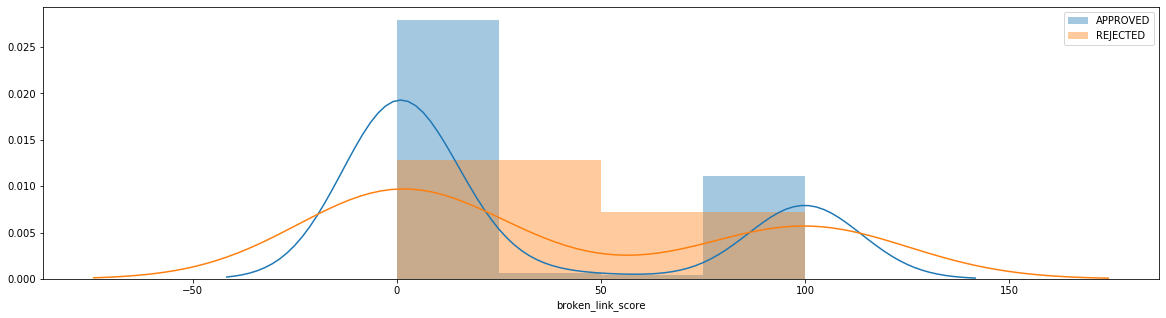

In [7]:
plt.figure(figsize=(20, 5))
sns.distplot(all_df[all_df.label == 'APPROVED']['broken_link_score'], label='APPROVED')
sns.distplot(all_df[all_df.label == 'REJECTED']['broken_link_score'], label='REJECTED')
plt.legend()
plt.show()

In [8]:
all_df[['broken_link_score', 'label']].groupby("label").describe()

broken_link_score                                                   
                     count       mean        std  min  25%  50%    75%    max
label                                                                        
APPROVED             321.0  29.764130  44.181058  0.0  0.0  0.0  100.0  100.0
REJECTED              25.0  37.733333  48.138689  0.0  0.0  0.0  100.0  100.0
REVIEWED             110.0  34.878788  46.772874  0.0  0.0  0.0  100.0  100.0

In [9]:
## Approved but scored 100 in broken links
anomaly_df = all_df[(all_df.label == 'APPROVED') & (all_df.broken_link_score == 100)]\
[['merchant_name','broken_link_score', 'label', 'website','broken_links']]

In [10]:
anomaly_df

,merchant_name,broken_link_score,label,website,broken_links
32,HuaningIndonesiaSukses,100.0,APPROVED,https://www.jomooz.com,{}
62,LUBRICANTS,100.0,APPROVED,http://payment.server-development.net,{'': 'None'}
70,BayyinahQuranIndonesia,100.0,APPROVED,bayyinah.id,{'': 'None'}
73,Aromanis,100.0,APPROVED,https://blanjamandiri.com,{'': 'None'}
74,CitraSuksesAbadi,100.0,APPROVED,https://blanjamandiri.com,{'': 'None'}
...,...,...,...,...,...
120,Glowy,100.0,APPROVED,https://www.glowi.id,{'': 'None'}
121,Valettashop,100.0,APPROVED,http://www.valettashop.com,{'': 'None'}
123,SportHelmetOnlineStore,100.0,APPROVED,https://sporthelmet.site/,{'': 'None'}
124,indovies.com,100.0,APPROVED,http://www.indovies.com,{'': 'None'}


In [13]:
def url_format_handler(url):
    """Return url with http/https prefix if not written"""

    if not url.startswith("http") and not url.startswith("https"):
        url = "http://" + url

    return url

In [16]:
import requests
for website in anomaly_df['website'].values:
    try:
        print(website + " " + str(requests.get(url_format_handler(website))))
    except Exception as e:
        print(website + " " + str(e))

https://www.jomooz.com <Response [522]>
http://payment.server-development.net <Response [200]>
bayyinah.id <Response [200]>
https://blanjamandiri.com <Response [200]>
https://blanjamandiri.com <Response [200]>
http://mantap.com <Response [403]>
https://blanjamandiri.com <Response [200]>
https://blanjamandiri.com <Response [200]>
https://blanjamandiri.com <Response [200]>
https://www.worldshopdeluxe.com HTTPSConnectionPool(host='www.worldshopdeluxe.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1076)')))
https://ieltsregistration-staging.britishcouncil.org/test-chooser <Response [200]>
www.globomart.co <Response [200]>
Https://hatapoda.id HTTPConnectionPool(host='https', port=80): Max retries exceeded with url: //hatapoda.id (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E6B2061FC8>: Failed to establish a new

Coier.co <Response [409]>
https://kitchenited.com HTTPSConnectionPool(host='kitchenited.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001E6B206D788>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))
http://ichveps.org/ <Response [200]>
https://guesthouse.waroengdiggers.com HTTPSConnectionPool(host='guesthouse.waroengdiggers.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1076)')))
Frameprint.archiola.com HTTPConnectionPool(host='frameprint.archiola.com', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection obj

http://hushhobbies.co HTTPConnectionPool(host='hushhobbies.co', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E6B2077808>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
https://shop.sapicow.com HTTPSConnectionPool(host='shop.sapicow.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001E6B207DB08>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
https://aphroditeindonesia.com HTTPSConnectionPool(host='aphroditeindonesia.com', port=443): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001E6B2077A88>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))
https://www.asamax.com/ HTTPSConnectionPool(host='www.asamax.com', port=443): Max retries exceeded with url: / (Caused by 

In [12]:
anomaly_df.shape

(45, 5)

In [14]:
## Remove anomaly
processed_df = all_df[~all_df['website'].isin(anomaly_df['website'])]

In [29]:
processed_df.head()

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,broken_links,website,label
0,CV.ASIATRIPINDONESIA,0.0,1.0,1.0,1.0,0.0,1.0,1.0,100.0,100.0,{},http://asiatrip.id/,APPROVED
1,Pt.BloomingLotusYoga,0.0,1.0,1.0,1.0,1.0,1.0,0.0,100.0,0.0,{},https://www.blooming-lotus-yoga.com,APPROVED
2,YayasanGreenSejahtera,0.0,1.0,1.0,1.0,1.0,1.0,1.0,100.0,100.0,{},https://greensejahterafoundation.com/,APPROVED
3,PTMatairTerraSolusi,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,{},http://www.matair.co.id,APPROVED
4,SimplyMii,0.0,1.0,0.0,1.0,0.0,0.0,0.0,50.0,0.0,{},https://www.simplymii.com/,APPROVED


In [30]:
processed_df[['broken_link_score', 'label']].groupby("label").describe()

broken_link_score                                                \
                     count       mean        std  min  25%    50%    75%   
label                                                                      
APPROVED             150.0   3.000000   9.536226  0.0  0.0    0.0    0.0   
REJECTED              21.0  39.682540  49.011391  0.0  0.0    0.0  100.0   
REVIEWED              14.0  58.571429  49.901001  0.0  0.0  100.0  100.0   

                 
            max  
label            
APPROVED   60.0  
REJECTED  100.0  
REVIEWED  100.0

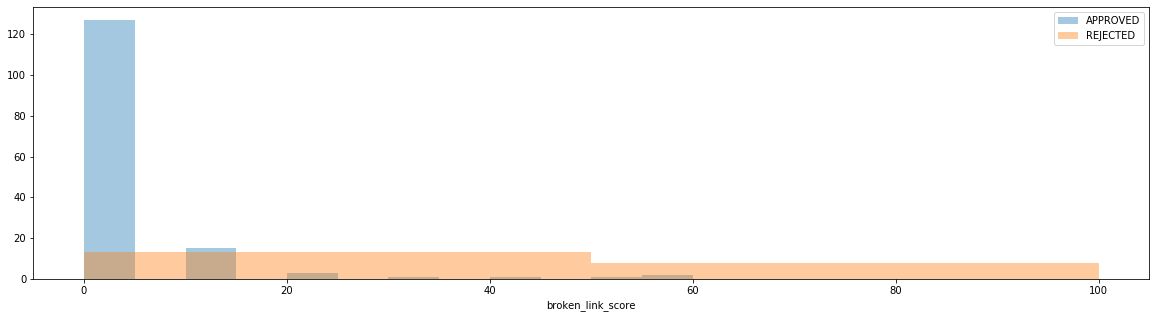

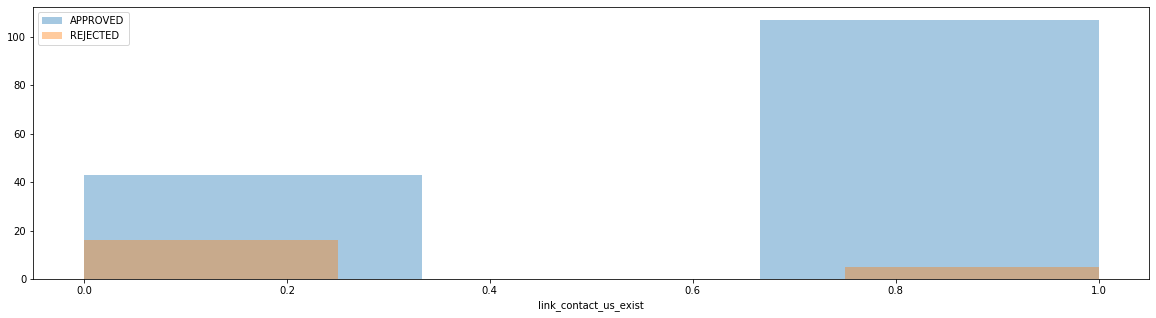

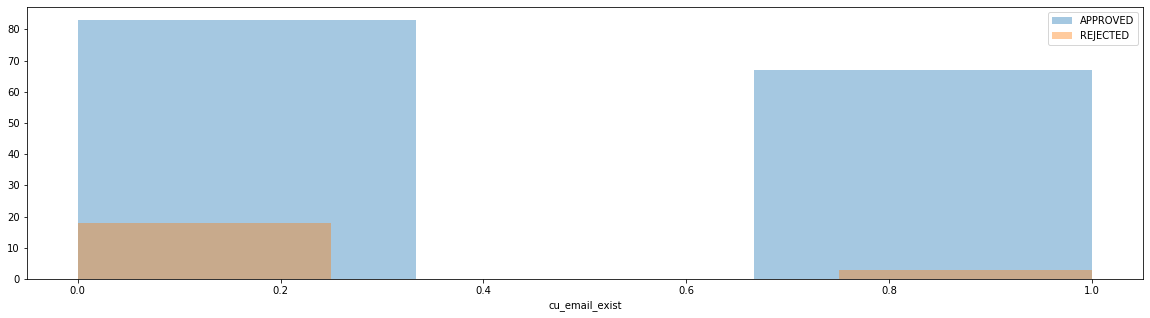

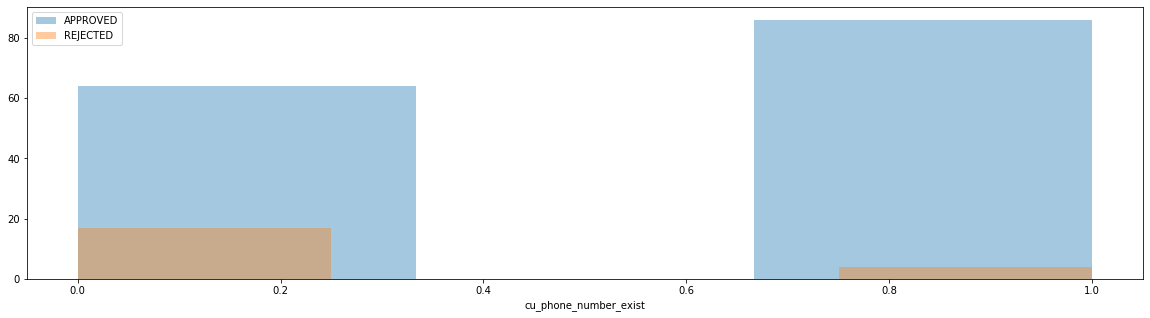

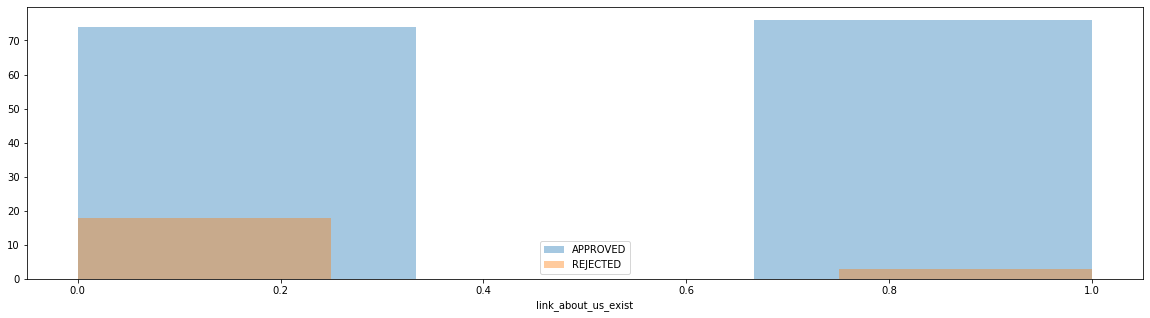

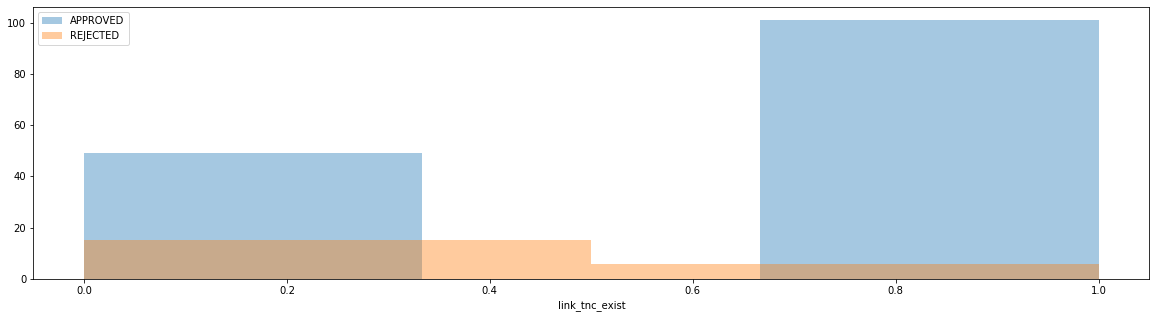

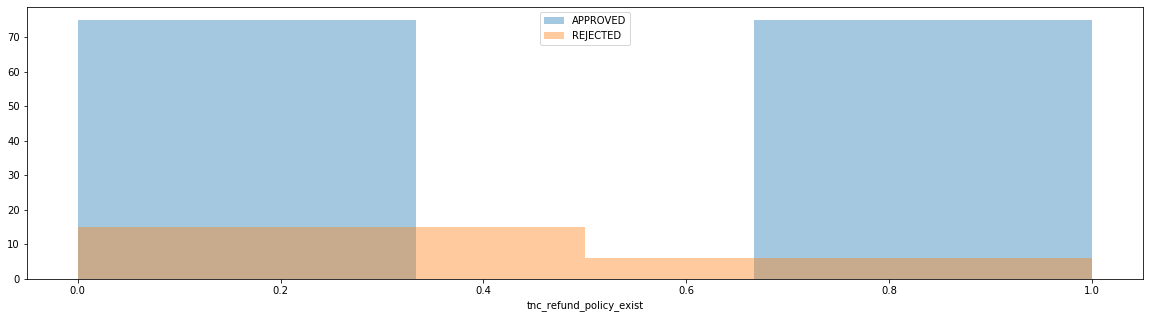

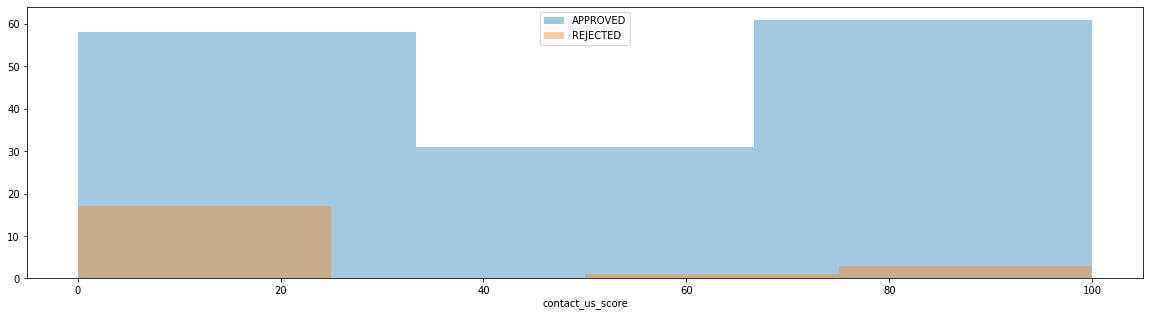

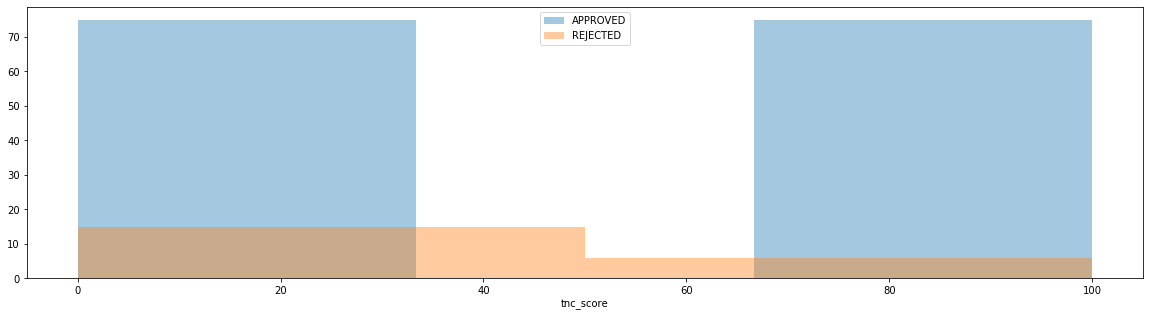

In [31]:
for column in processed_df.columns.values:
    if column == 'website' or column == 'broken_links' or column == 'merchant_name' or column == 'label':
        continue
    plt.figure(figsize=(20, 5))
    sns.distplot(processed_df[processed_df.label == 'APPROVED'][column], label='APPROVED', kde=False)
    sns.distplot(processed_df[processed_df.label == 'REJECTED'][column], label='REJECTED', kde=False)
    plt.legend()
    plt.show()